# Cylindrical Systems In General Relativity by Bronnikov  Santos and Wang
##  Geoff Cope
##  Univeristy of Utah
##  December 28, 2021

This is also a very long paper with a large number of metrics.  Here we concentrate on metric 2.23 the Weyl Metric.  The vacuum field equations are derived and listed as 2.23 - 2.26  We'll do some others another time.

https://arxiv.org/abs/1901.06561

As mentioned in the paper there is a quote from J.L. Synge that appears at the top of page 313 in Relativity The General Theory.  "We now come to the most amazing fact in this work:  written out explicitly in the form (our equation 2.25 this paper) the equation is recognized as Laplace's equation in cyclindrical coordinates." 

https://archive.org/details/relativitygenera0000syng

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,rho,phi,z,dt,drho,dphi,dz = symbols( 't rho phi z dt drho dphi dz' ) 

In [34]:
Lambda = Function('lambda')(rho,z)
Lambda

In [5]:
mu = Function('mu')(rho,z)
mu

In [6]:
variables = Matrix( [t,rho,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix( [dt,drho,dphi,dz] ) 
differentials

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [8]:
lineElement = expand( exp(2*Lambda)*dt**2 - exp(-2*Lambda) * ( exp(2*mu) * (drho**2 + dz**2 ) + rho**2 * dphi**2 ) ) 
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ 2⋅λ(ρ, z)                                                                   ⎤
⎢ℯ                      0                    0                    0           ⎥
⎢                                                                             ⎥
⎢              -2⋅λ(ρ, z)  2⋅μ(ρ, z)                                          ⎥
⎢    0       -ℯ          ⋅ℯ                  0                    0           ⎥
⎢                                                                             ⎥
⎢                                       2  -2⋅λ(ρ, z)                         ⎥
⎢    0                  0             -ρ ⋅ℯ                       0           ⎥
⎢                                                                             ⎥
⎢                                                        -2⋅λ(ρ, z)  2⋅μ(ρ, z)⎥
⎣    0                  0                    0         -ℯ          ⋅ℯ         ⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡ 2⋅λ(ρ, z)                                                                   ⎤
⎢ℯ                      0                    0                    0           ⎥
⎢                                                                             ⎥
⎢              -2⋅λ(ρ, z)  2⋅μ(ρ, z)                                          ⎥
⎢    0       -ℯ          ⋅ℯ                  0                    0           ⎥
⎢                                                                             ⎥
⎢                                       2  -2⋅λ(ρ, z)                         ⎥
⎢    0                  0             -ρ ⋅ℯ                       0           ⎥
⎢                                                                             ⎥
⎢                                                        -2⋅λ(ρ, z)  2⋅μ(ρ, z)⎥
⎣    0                  0                    0         -ℯ          ⋅ℯ         ⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("t rho phi z")
t,rho,phi,z = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                            ⎡ 4⋅λ(ρ, z)  -2⋅μ(ρ, z) ∂                                                                   
⎢                                            ⎢ℯ         ⋅ℯ          ⋅──(λ(ρ, z))                                                    0    
⎢                                            ⎢                       ∂ρ                                                                  
⎢                                            ⎢                                                                                           
⎢⎡             ∂               ∂          ⎤  ⎢                                     ⎛   -2⋅λ(ρ, z)  2⋅μ(ρ, z) ∂                -2⋅λ(ρ, z) 
⎢⎢     0       ──(λ(ρ, z))  0  ──(λ(ρ, z))⎥  ⎢                                    -⎜2⋅ℯ          ⋅ℯ         ⋅──(λ(ρ, z)) - 2⋅ℯ          ⋅
⎢⎢             ∂ρ              ∂z         ⎥  ⎢                                     ⎝                         ∂ρ                          
⎢⎢                                

In [16]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡⎛    2                2                       ⎞                                                                                         
⎢⎜   ∂                ∂             ∂          ⎟  4⋅λ(ρ, z) - 2⋅μ(ρ, z)                                                                  
⎢⎜ρ⋅───(λ(ρ, z)) + ρ⋅───(λ(ρ, z)) + ──(λ(ρ, z))⎟⋅ℯ                                                                                       
⎢⎜    2                2            ∂ρ         ⎟                                                                                         
⎢⎝  ∂ρ               ∂z                        ⎠                                                                                         
⎢──────────────────────────────────────────────────────────────────────                                                        0         
⎢                                  ρ                                                                                                     
⎢                                 

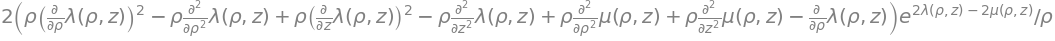

In [17]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [18]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡⎛    2                2                       ⎞                          ⎛               2       2                           2       2  
⎢⎜   ∂                ∂             ∂          ⎟  4⋅λ(ρ, z) - 2⋅μ(ρ, z)   ⎜  ⎛∂          ⎞       ∂               ⎛∂          ⎞       ∂   
⎢⎜ρ⋅───(λ(ρ, z)) + ρ⋅───(λ(ρ, z)) + ──(λ(ρ, z))⎟⋅ℯ                        ⎜ρ⋅⎜──(λ(ρ, z))⎟  - ρ⋅───(λ(ρ, z)) + ρ⋅⎜──(λ(ρ, z))⎟  - ρ⋅───(λ
⎢⎜    2                2            ∂ρ         ⎟                          ⎜  ⎝∂ρ         ⎠        2              ⎝∂z         ⎠        2  
⎢⎝  ∂ρ               ∂z                        ⎠                          ⎝                     ∂ρ                                  ∂z   
⎢────────────────────────────────────────────────────────────────────── - ───────────────────────────────────────────────────────────────
⎢                                  ρ                                                                                                     
⎢                                 

In [19]:
simplify(einst.tensor())

⎡⎛                 2           2                           2           2                2                2                           ⎞   
⎢⎜    ⎛∂          ⎞           ∂               ⎛∂          ⎞           ∂                ∂                ∂                 ∂          ⎟  4
⎢⎜- ρ⋅⎜──(λ(ρ, z))⎟  + 2.0⋅ρ⋅───(λ(ρ, z)) - ρ⋅⎜──(λ(ρ, z))⎟  + 2.0⋅ρ⋅───(λ(ρ, z)) - ρ⋅───(μ(ρ, z)) - ρ⋅───(μ(ρ, z)) + 2.0⋅──(λ(ρ, z))⎟⋅ℯ 
⎢⎜    ⎝∂ρ         ⎠            2              ⎝∂z         ⎠            2                2                2                ∂ρ         ⎟   
⎢⎝                           ∂ρ                                      ∂z               ∂ρ               ∂z                            ⎠   
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                             ρ                                                          
⎢                                 

In [20]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [21]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

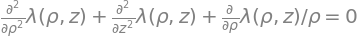

In [22]:
equation2pt24 = Eq( expand((1/rho)*Ric.tensor()[0,0].args[1]) , 0 ) 
equation2pt24

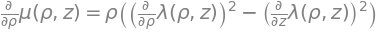

In [23]:
equation2pt25 = Eq(diff(mu,rho),solve( simplify(einst.tensor())[3,3] , diff(mu,rho))[0] ) 
equation2pt25

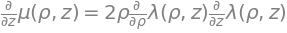

In [24]:
equation2pt26 = Eq(diff(mu,z),solve( simplify(einst.tensor())[1,3], diff(mu,z) )[0])
equation2pt26

In [25]:
vacuumFieldEquations = Matrix([equation2pt24,equation2pt25,equation2pt26])
vacuumFieldEquations

/opt/anaconda3/lib/python3.8/site-packages/sympy/matrices/repmatrix.py:98: SymPyDeprecationWarning: 

non-Expr objects in a Matrix has been deprecated since SymPy 1.9. Use
list of lists, TableForm or some other data structure instead. See
https://github.com/sympy/sympy/issues/21497 for more info.

  SymPyDeprecationWarning(


⎡                                ∂                ⎤
⎢    2              2            ──(λ(ρ, z))      ⎥
⎢   ∂              ∂             ∂ρ               ⎥
⎢  ───(λ(ρ, z)) + ───(λ(ρ, z)) + ─────────── = 0  ⎥
⎢    2              2                 ρ           ⎥
⎢  ∂ρ             ∂z                              ⎥
⎢                                                 ⎥
⎢                ⎛             2                2⎞⎥
⎢∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(μ(ρ, z)) = ρ⋅⎜⎜──(λ(ρ, z))⎟  - ⎜──(λ(ρ, z))⎟ ⎟⎥
⎢∂ρ              ⎝⎝∂ρ         ⎠    ⎝∂z         ⎠ ⎠⎥
⎢                                                 ⎥
⎢    ∂                 ∂           ∂              ⎥
⎢    ──(μ(ρ, z)) = 2⋅ρ⋅──(λ(ρ, z))⋅──(λ(ρ, z))    ⎥
⎣    ∂z                ∂ρ          ∂z             ⎦

In [26]:
from sympy import * 

In [27]:
X, Y = map(Function, 'XY')

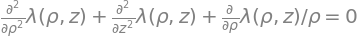

In [28]:
eq = vacuumFieldEquations[0]
eq

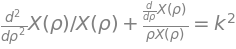

In [37]:
xODE = Eq(pde_separate( eq, Lambda, [X(rho),Y(z)])[0] , k**2 ) 
xODE

In [36]:
Lambda